<div style="padding: 0.5em; background-color: #1876d1; color: #fff;">

### **[Part 6] Computational Drug Discovery - App Deployment**

</div>
In Part 6, we will be deploying a web application to put our model in production for real prediction.

Note :
* Target enzyme: Aromatase responsible for breast cancer
* Objective: find compound that inhibit Aromatase function

---
<b># Bioinformatics Project </b>

## **1. Pickup Best model and save**

### Read in data

In [1]:
import pandas as pd
dataset = pd.read_csv("data/06-bioactivity_data_3classpubchem_fp.csv")
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148736
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301029
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623241
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.243364
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.266803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2592,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.882729
2593,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.882729
2594,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623606
2595,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.958568


In [2]:
X = dataset.drop(['pIC50'], axis=1)
Y = dataset.iloc[:,-1]

### Remove low variance features

In [3]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)

### Build model

From previous part we already identified `RandomForestRegressor` as the best model for `Aromatose`.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.8344101943791757

In [6]:
Y_pred = model.predict(X)
Y_pred

array([4.79322714, 4.79322714, 7.11119661, ..., 6.65114366, 6.40536353,
       6.07981869])

### Model Performance

In [7]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.27
Coefficient of determination (R^2): 0.83


### Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

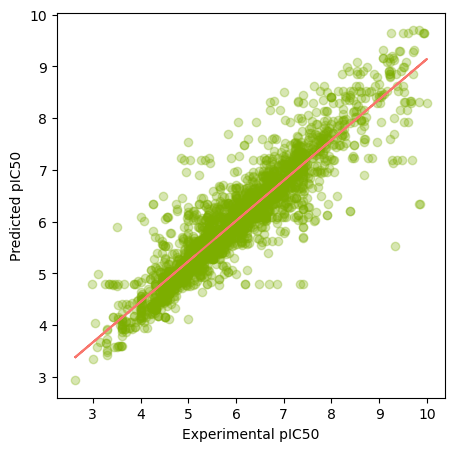

In [9]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

### Save Model as Pickle Object

In [22]:
import pypickle
pypickle.save('Part_6_Deployment_App/utils/best_model.pkl', model)

[pypickle] Pickle file saved: [Part_6_Deployment_App/utils/best_model.pkl]


True

## **2. Build Steamlit App**

Refere to Folder `Part_6_Deployment_App` folder for this section

---